# Домашние задания по курсу "Построение выводов по данным"
### Специализация "Машинное обучение и анализ данных" (Яндекс, МФТИ). Coursera.

#### 1 неделя.

## Доверительные интервалы для среднего

### Задача 1
Пусть $X\sim F(x)$ — случайная величина с произвольным распределением, неизвестным математическим ожиданием $\mathbb{E}X$ и известной дисперсией $\mathbb{D}X$. Как выглядит доверительный интервал для $\mathbb{E}X$ с приближённым уровнем доверия $100(1-\alpha)%$?

##### **Решение:**

Можно оценить матожидание с применением ЦПТ. В этом случае хорошей оценкой матожидания исходной выборки будет выборочное среднее $\overline{X_n}$. Выборочное среднее — это нормально распределённая
случайная величина: $\overline{X_n} \sim N \left (\mu, \frac{\mathbb{D}X}{n} \right)$
Доверительный интервал в таком случае будет задан по формуле
$$ \overline{X_n} \pm z_{1-\alpha/2}\cdot\sqrt{\frac{\mathbb{D}X}{n}}$$

### Задача 2
Для 61 большого города в Англии и Уэльсе известны средняя годовая смертность на 100000 населения (по данным 1958–1964) и концентрация кальция в питьевой воде (в частях на миллион). Чем выше концентрация кальция, тем жёстче вода. Города дополнительно поделены на северные и южные.

Постройте 95% доверительный интервал для средней годовой смертности в больших городах. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки. 

**Будьте осторожны при использовании метода std()!** Дело в том, что у объекта numpy он по умолчанию вычисляется как $$\sqrt{\frac1{n}\sum\limits_{i=1}^n\left(X_i-\bar{X}\right)^2}$$

​, а у объекта pandas — как

$$\sqrt{\frac1{n-1}\sum\limits_{i=1}^n\left(X_i-\bar{X}\right)^2}$$
​.

Нас интересует только второй вариант, несмещённая оценка стандартного отклонения.

Чтобы не думать всё время о том, правильно ли вычисляется в вашем случае std(), можно всегда использовать std(ddof=1) (ddof — difference in degrees of freedom), тогда нормировка всегда будет на n-1.

##### **Решение**

Поскольку дисперсия генеральной совокупности неизвестна, используем выборочные дисперсии и t-критерий, и построим доверительные интервалы вида
$$\bar{X}_n \pm t_{1-\frac{\alpha}{2}} \frac{S}{\sqrt{n}}$$

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving c4_w1_tren_test_water.txt to c4_w1_tren_test_water.txt


In [ ]:
import pandas as pd
from scipy import stats

In [ ]:
df = pd.read_csv('/content/c4_w1_tren_test_water.txt', sep = '\t')
df.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [ ]:
X_mean = df.mortality.mean()
X_std = df.mortality.std() / len(df)**0.5

In [ ]:
a = 1 - 0.05 / 2
t = stats.t(len(df) - 1).isf(a)

In [ ]:
print(f'Доверительный интервал для среднегодовой смертности: {round(X_mean + t * X_std, 4)} - {round(X_mean - t * X_std, 4)}')

Доверительный интервал для среднегодовой смертности: 1476.0833 - 1572.2117


In [ ]:
# Воспользуемся специальной библиотекой statsmodels
from statsmodels.stats.weightstats import _tconfint_generic
print("95%% confidence interval", _tconfint_generic(X_mean, X_std, len(df) - 1, 0.05, 'two-sided'))

95%% confidence interval (1476.0833413552848, 1572.2117406119285)


### Задача 3

На данных из предыдущего вопроса постройте 95% доверительный интервал для средней годовой смертности по всем южным городам. Чему равна его верхняя граница? Округлите ответ до 4 знаков после десятичной точки.

##### **Решение**
Все в точности аналогично предыдущей задаче, но строим только для подвыборки из южных городов

In [ ]:
X_mean_s = df[df.location == 'South'].mortality.mean()
X_std_s = df[df.location == 'South'].mortality.std() / len(df[df.location == 'South'])**0.5

In [ ]:
a = 1 - 0.05 / 2
t = stats.t(len(df[df.location == 'South']) - 1).isf(a)
print(f'Доверительный интервал для среднегодовой смертности южных городов: {round(X_mean_s + t * X_std_s, 4)} - {round(X_mean_s - t * X_std_s, 4)}')

Доверительный интервал для среднегодовой смертности южных городов: 1320.1517 - 1433.4636


In [ ]:
from statsmodels.stats.weightstats import _tconfint_generic
print("95%% confidence interval", _tconfint_generic(X_mean_s, X_std_s, len(df[df.location == 'South']) - 1, 0.05, 'two-sided'))

95%% confidence interval (1320.1517462936238, 1433.463638321761)


### Задача 4

На тех же данных постройте 95% доверительный интервал для средней годовой смертности по всем северным городам. Пересекается ли этот интервал с предыдущим? Как вы думаете, какой из этого можно сделать вывод? 
 - Интервалы пересекаются; похоже, средняя смертность на севере и на юге одинаковая
 - Интервалы пересекаются; видимо, средняя смертность на севере и на юге существенно разная
 - Интервалы не пересекаются; видимо, средняя смертность на севере и на юге существенно разная  
 - Интервалы не пересекаются; похоже, средняя смертность на севере и на юге одинаковая

##### **Решение**

In [ ]:
X_mean_n = df[df.location == 'North'].mortality.mean()
X_std_n = df[df.location == 'North'].mortality.std() / len(df[df.location == 'North'])**0.5
a = 1 - 0.05 / 2
t = stats.t(len(df[df.location == 'North']) - 1).isf(a)
print(f'Доверительный интервал для среднегодовой смертности северных городов: {round(X_mean_n + t * X_std_n, 4)} - {round(X_mean_n - t * X_std_n, 4)}')

Доверительный интервал для среднегодовой смертности северных городов: 1586.5605 - 1680.6395


Интервалы не пересекаются; видимо, средняя смертность на севере и на юге существенно разная

### Задача 5

Пересекаются ли 95% доверительные интервалы для средней жёсткости воды в северных и южных городах?

##### **Решение**

In [ ]:
X_mean_n = df[df.location == 'North'].hardness.mean()
X_std_n = df[df.location == 'North'].hardness.std() / len(df[df.location == 'North'])**0.5
a = 1-0.05/2
t = stats.t(len(df[df.location == 'North']) - 1).isf(a)
print(f'Доверительный интервал для средней жесткости воды северных городов: {round(X_mean_n + t * X_std_n, 4)} - {round(X_mean_n - t * X_std_n, 4)}')

Доверительный интервал для средней жесткости воды северных городов: 21.4225 - 39.3775


In [ ]:
X_mean_s = df[df.location == 'South'].hardness.mean()
X_std_s = df[df.location == 'South'].hardness.std() / len(df[df.location == 'South'])**0.5
a = 1 - 0.05 / 2
t = stats.t(len(df[df.location == 'South']) - 1).isf(a)
print(f'Доверительный интервал для средней жесткости воды южных городов: {round(X_mean_s + t * X_std_s, 4)} - {round(X_mean_s - t * X_std_s, 4)}')

Доверительный интервал для средней жесткости воды южных городов: 53.4672 - 86.0713


Интервалы не пересекаются

### Задача 6

Вспомним формулу доверительного интервала для среднего нормально распределённой случайной величины с дисперсией $\sigma^2$:

$$\bar{X}_n\pm z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}$$

При $\sigma=1$ какой нужен объём выборки, чтобы на уровне доверия 95% оценить среднее с точностью $\pm0.1$?

##### **Решение**
$$z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}} = 0.1$$
$$\frac{1}{\sqrt{n}} = \frac{0.1}{z_{1-\frac{\alpha}{2}}}$$
$$\sqrt{n} = \frac{z_{1-\frac{\alpha}{2}}}{0.1}$$
$$n = \left (\frac{z_{1-\frac{\alpha}{2}}}{0.1} \right )^2$$

In [ ]:
from scipy import stats
import numpy as np
a = 1 - 0.05 / 2
z = stats.norm().isf(a)
n = (z / 0.1)**2
print('Чтобы на уровне доверия 95% оценить среднее с точностью ±0.1 нужен объем выборки =', int(np.ceil(n)))

Чтобы на уровне доверия 95% оценить среднее с точностью ±0.1 нужен объем выборки = 385


### Задача 7

Объём выборки, необходимый для построения доверительного интервала заданной ширины (выбрать правильные ответы):

- увеличивается с уменьшением требуемой ширины ДА

- уменьшается с ростом $\alpha$ ДА

- увеличивается с увеличением требуемой ширины  НЕТ

- увеличивается с ростом $\alpha$    НЕТ

- увеличивается с ростом дисперсии выборки ДА

- уменьшается с ростом дисперсии выборки  НЕТ

##### **Решение**
При решении предыдущей задачи мы вывели формулу для расчета требуемого объема выборки. Добавим в это выражение еще дисперсию
$$n = \left (\frac{z_{1-\frac{\alpha}{2}} \cdot \sigma}{L} \right )^2$$,
где $L$ - ширина доверительного интервала.\
Соответственно, чем шире доверительный интервал и меньше дисперсия, требуется меньше объем выборки и наоброт.\
Что касается $\alpha$, то это также показатель ширины доверительного интервала, и чем шире доверительный интервал, тем больше $\alpha$, тем больше $z$-значение.

## Доверительные интервалы для долей

### Задача 1

Большая часть млекопитающих неспособны во взрослом возрасте переваривать лактозу, содержащуюся в молоке. У людей за расщепление лактозы отвечает фермент лактаза, кодируемый геном LCT. У людей с вариантом 13910T этого гена лактаза продолжает функционировать на протяжении всей жизни. Распределение этого варианта гена сильно варьируется в различных генетических популяциях.

Из 50 исследованных представителей народа майя вариант 13910T был обнаружен у одного. Постройте нормальный 95% доверительный интервал для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

##### **Решение**
Нормальный доверительный интервал для доли имеет вид:
$$ p \pm z_{1-\alpha/2}\cdot\sqrt{\frac{p(1-p)}{n}}$$,
Где p - вероятность события из биномиального распределения, а n - объем выборки.

In [ ]:
from scipy import stats
import numpy as np

n = 50
p = 1 / n
a = 1 - 0.05 / 2
z = stats.norm().isf(a)
prop = np.sqrt(p * (1 - p) / n )

print(f'95% Доверительный интервал для доли носителей гена: {round(p + z * prop, 4)} - +{round(p - z * prop, 4)}')

95% Доверительный интервал для доли носителей гена: -0.0188 - +0.0588


In [ ]:
# Есть другой способ для расчета
from statsmodels.stats.proportion import proportion_confint

normal_interval = proportion_confint(1, 50, method = 'normal', alpha = 0.05)
print(f'95% Доверительный интервал для доли носителей гена: {normal_interval[0]} - +{normal_interval[1]}')

95% Доверительный интервал для доли носителей гена: 0.0 - +0.05880530708179099


Как видим, во втором случае нижняя граница доверительного интервала обнулена. Значит, будет надежнее использовать исходную формулу.

### Задача 2
В условиях предыдущей задачи постройте 95% доверительный интервал Уилсона для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

##### **Решение**
Доверительный интервал Уилсона для доли имеет вид:
$$ \frac {1}{1+ \frac{z^2}{n}} \cdot \left (p + \frac{z^2}{2n} \pm z\cdot\sqrt{\frac{p(1-p)}{n} + \frac{z^2}{4n^2}} \right )$$,
где $$z = z_{1-\alpha/2}$$

In [ ]:
from scipy import stats
import numpy as np

n = 50
p = 1 / n
a = 1 - 0.05 / 2
z = stats.norm().isf(a)
c = z**2/n

prop = np.sqrt(p * (1 - p) / n + c / 4 / n)
left = 1 / (1 + c) * (p + c / 2 + z * prop)
right = 1 / (1 + c) * (p + c / 2 - z * prop)

print(f'95% Доверительный интервал для доли носителей гена: {left} - {right}')

95% Доверительный интервал для доли носителей гена: 0.003539259271646236 - 0.10495443589637815


In [ ]:
# Или с использованием библиотеки statsmodels
from statsmodels.stats.proportion import proportion_confint

wilson_interval = proportion_confint(1, 50, method = 'wilson', alpha = 0.05)
print(f'95% Доверительный интервал для доли носителей гена: {wilson_interval[0]} - {wilson_interval[1]}')

95% Доверительный интервал для доли носителей гена: 0.003539259271646236 - 0.10495443589637815


### Задача 3
Какой из двух построенных доверительных интервалов выглядит более вменяемым, учитывая, что параметр, для которого строится оценка, меняется от 0 до 1 (нормальный или Уилсона)?

##### **Решение**
Конечно, доверительный интервал Уилсона выглядит более вменяемым. Во-первых, потому что нижняя граница нормального интервала "ушла" в отрицательную зону. Во-вторых, потому что для сильно несбалансированных выборок интервал Уилсона дает более качественные оценки.

### Задача 4

Пусть в популяции майя действительно 2% носителей варианта 13910T, как в выборке, которую мы исследовали. Какой объём выборки нужен, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью $\pm0.01$ на уровне доверия 95%?

##### **Решение**

$$ z_{1-\alpha/2}\cdot\sqrt{\frac{p(1-p)}{n}} = 0.01$$
$$ z_{1-\alpha/2}^2\cdot\frac{p(1-p)}{n} = 0.01^2$$
$$ n = \frac{p(1-p) \cdot z_{1-\alpha/2}^2}{0.01^2}$$

In [ ]:
from scipy import stats
import numpy as np

p = 1 / 50
a = 1 - 0.05 / 2
z = stats.norm().isf(a)

n = p * (1 - p) * z**2 / 0.01**2

print('Чтобы на уровне доверия 95% оценить долю носителей гена с точностью ±0.1 нужен объем выборки =', int(np.ceil(n)))

Чтобы на уровне доверия 95% оценить долю носителей гена с точностью ±0.1 нужен объем выборки = 753


In [ ]:
# Или с использованием библиотеки statsmodels
from statsmodels.stats.proportion import samplesize_confint_proportion
n_samples = samplesize_confint_proportion(1/50, 0.01, alpha = 0.05)
print('Чтобы на уровне доверия 95% оценить долю носителей гена с точностью ±0.1 нужен объем выборки =', int(np.ceil(n_samples)))

Чтобы на уровне доверия 95% оценить долю носителей гена с точностью ±0.1 нужен объем выборки = 753


### Задача 5
Постройте график зависимости объёма выборки, необходимого для оценки для доли носителей гена 13910T с точностью $\pm0.01$ на уровне доверия 95%, от неизвестного параметра $p$. Посмотрите, при каком значении $p$ нужно больше всего испытуемых. Как вы думаете, насколько вероятно, что выборка, которую мы анализируем, взята из случайной величины с этим значением параметра?

Как бы вы не ответили на последний вопрос, рассмотреть объём выборки, необходимый при таком $p$, всё равно полезно — это даёт максимально пессимистичную оценку необходимого объёма выборки.

Какой объём выборки нужен в худшем случае, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью $\pm0.01$ на уровне доверия 95%?  

##### **Решение**
Используем формулу, выведенную в прошлой задаче
$$ n = \frac{p(1-p) \cdot z_{1-\alpha/2}^2}{0.01^2}$$

In [ ]:
def n_samles(p, alpha = 0.05, prec = 0.01):
  from scipy import stats
  a = 1 - alpha / 2
  z = stats.norm.isf(a)

  return p * (1 - p) * z**2 / prec**2

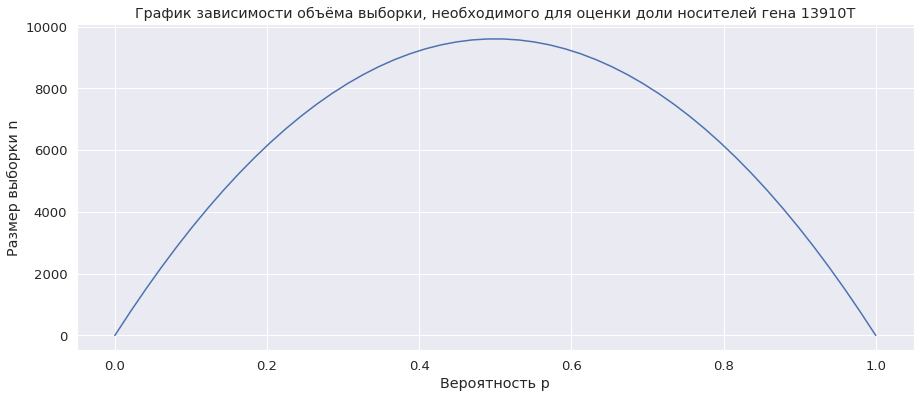

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.2)
import numpy as np

p = np.linspace(0, 1, num=50, endpoint=True)

plt.figure(figsize = (15, 6))
plt.xlabel('Вероятность p')
plt.ylabel('Размер выборки n')
plt.title('График зависимости объёма выборки, необходимого для оценки доли носителей гена 13910T')

plt.plot(p, n_samles(p))
plt.show()

Найдем, при каком значении $p$ требуется наибольший объем выборки и точный размер этой выборки

In [ ]:
from scipy.optimize import minimize

def f(p, alpha=0.05, prec=0.01):
    return -n_samles(p, alpha, prec)

res = minimize(f, 0)
print('Наибольший объем выборки требуется при p =', round(res.x[0], 4))

Наибольший объем выборки требуется при p = 0.5


In [ ]:
print('В худшем случае, если вероятность наличия гена составляет 0.5 требуется выборка, размером', int(np.ceil(n_samles(0.5))))

В худшем случае, если вероятность наличия гена составляет 0.5 требуется выборка, размером 9604


- *Посмотрите, при каком значении  p  нужно больше всего испытуемых*. 

Максимальный объем выборки для оценки доли нужен при вероятности наличия этого гена = 0.5

- *Как вы думаете, насколько вероятно, что выборка, которую мы анализируем, взята из случайной величины с этим значением параметра?*

Мы анализируем выборку с вероятностью $p = 0.02$. Маловероятно, чтобы это была выборка из биномиального распределения с вероятностью наличия гена $p = 0.5$.



## Доверительные интервалы по всем темам

### Задача 1

Давайте уточним правило трёх сигм. Утверждение: 99.7% вероятностной массы случайной величины $X\sim N\left(\mu,\sigma^2\right)$ лежит в интервале $\mu\pm c \cdot \sigma$. Чему равно точное значение константы $c$? Округлите ответ до четырёх знаков после десятичной точки. 

###### **Решение:**

Перепишем задачу в другом виде.
$$P(\mu − c\cdot \sigma \leq X \leq \mu + с\cdot\sigma) = 0.997$$

Т.е. вероятность того, что X окажется за этими пределами равна $1 - 0.997 = 0.003$

Поскольку нормальное распределение симметрично относильно $\mu$, выражение можно переписать в следующем виде:

$$P(X \leq \mu − c\cdot \sigma) = P(X \geq \mu + с\cdot\sigma) = \frac{0.003}{2} = 0.0015$$

Воспользуемся библиотекой scipy, чтобы узнать, при каком значении $Xa$ мы получим такое значение вероятности.

In [1]:
from scipy import stats
Xa = stats.norm.isf(0.0015)

In [5]:
from scipy import stats
x = stats.norm.isf(0.25)
import numpy as np
x * np.sqrt(0.75*0.25*1200)

10.117346252941225

Стандартное нормальное распределение имеет $\mu = 0, \sigma = 1$. Тогда $Xa = 0 + c\cdot1 = c$

In [ ]:
print('Значение c =', round(Xa, 4))

Значение c = 2.9677


### Задача 2
Пусть $X\sim N\left(\mu, \sigma^2\right)$. Какое распределение имеет величина $\frac{\bar{X}_n-\mu}{S_n/\sqrt{n}}$?

###### **Решение:**

$S_n$ - это выборочная дисперсия. В примере приведена формула для расчета T-статистики, которая подчиняется распределению Стьюдента. $ \sim St(n−1)$

### Задача 3
Выберите все распределения с несимметричной функцией плотности. Фишера, хи-квадрат, Гаусса, Стьюдента

##### **Решение:**

- Гаусса - это нормальное распределение. Оно симметрично.
- Стьюдента - это распределение, похожее на нормальное, но имеющее более тяжелые "хвосты". При размере выборки от 30 становится практически нормальным. Это симметричное распределение.
- **Хи-квадрат**. Распределе́ние $\chi ^{2}$ с $k$ степенями свободы — это распределение суммы квадратов $k$ независимых стандартных нормальных случайных величин. Оно не симметрично.
- **Фишера**. Пусть теперь определены две независимые случайные величины $X_1$ и $X_2$, принадлежащие распределению $\chi^2$:
$X_1 \sim \chi_{d_1}^2, X_2 \sim \chi_{d_2}^2$

Распределение случайной величины $X = \frac{X_1/d_1}{X_2/d_2} \sim F(d_1, d_2)$ называется распределением Фишера с числом степеней свободы $d_1$ и $d_2$. Оно не симметричное.

### Задача 4.
Какое выражение задаёт доверительный интервал для разности долей в связанных выборках?

###### **Решение:**

Начнем с определения **доверительного интервала для доли**.\
Доверительный интервал описывается следующим неравенством:
$$  - z_{1-\alpha/2} \leq X \leq z_{1-\alpha/2}$$,
где $X$ - стандартизированная случайная величина из нормального распределения.

Если мы хотим оценить размер доли в выборке, то имеем всего 2 исхода - относится к доле, не относится к доле. А значит, мы имеем дело с биномиальным распределением, где 1 - это успех, 0 - неудача. 
Введем случайную величину $K$, обозначающую число успехов в серии из $n$ испытаний.

$ K\sim Bin(n,p)$. Матожидание = $np$, а дисперсия $npq$, где $q = 1-p$ ($p$ - вероятность успеха.\
Если $n$ большое, то в силу центральной предельной теоремы можно сказать, что $Bin(n,p) \sim N(np, npq)$ — нормальное распределение с математическим ожиданием $np$ и дисперсией $npq$.

Перейдем к стандартизированной форме для $K$, т.е. переведем распределение $K$ от нормального к стандартному нормальному (Вычтем матожидание и разделим на стандартное отклонение).

$$ Z = \frac{K-np}{\sqrt{npq}}$$

Подставим в выражение доверительного интервала:
$$  - z_{1-\alpha/2} \leq \frac{K-np}{\sqrt{npq}} \leq z_{1-\alpha/2}$$

$$  - z_{1-\alpha/2}\cdot\sqrt{npq} \leq K-np \leq z_{1-\alpha/2}\cdot\sqrt{npq}$$

$$np - z_{1-\alpha/2}\cdot\sqrt{npq} \leq K \leq np + z_{1-\alpha/2}\cdot\sqrt{npq}$$

$$p - z_{1-\alpha/2}\cdot\sqrt{\frac{pq}{n}} \leq \frac{K}{n} \leq p + z_{1-\alpha/2}\cdot\sqrt{\frac{pq}{n}}$$

$$p - z_{1-\alpha/2}\cdot\sqrt{\frac{p(1-p)}{n}} \leq \frac{K}{n} \leq p + z_{1-\alpha/2}\cdot\sqrt{\frac{p(1-p)}{n}}$$

Но $\frac{K}{n}$ это как раз и есть размер доли. Получим доверительный интервал для доли:


$$ \frac{K}{n} = p \pm z_{1-\alpha/2}\cdot\sqrt{\frac{p(1-p)}{n}}$$

Перейдем к доверительному интервалу **для разности двух долей в независимых выборках**.

Мы выяснили выше, что: 
$$K \sim N(np, npq) \Rightarrow \frac{K}{n} \sim N(p, \frac{pq}{n})$$

Обозначим относительную частоту успехов первой выборки, как $\frac{K_1}{n_1}$, относительную частоту успехов второй выборки, как $\frac{K_2}{n_2}$.

Тогда в силу композиционной устойчивости нормального распределения, разность относительных частот также будет иметь нормальное распределение.
Рассчитаем матожидание и дисперсию для разности.

Матожидание разности = разности матожиданий.
Дисперсия разности (для независимых выборок) равна сумме дисперсий.

Обозначим разности относительных частот за $H$. Тогда:

$$ H \sim N \left(p1-p2, \frac{p_1q_1}{n_1} + \frac{p_2q_2}{n_2}\right)$$

Подставим корень из дисперсии и матожидание в выражение доверительного интервала для $\frac{K}{n}$:

$$ p_1 - p_2 \pm z_{1-\alpha/2}\cdot\sqrt{\frac{p_1(1-p_1)}{n_1} + \frac{p_2(1-p_2)}{n_2}}$$

Теперь перейдем к доверительному интервалу **для разницы двух долей в связанных выборках**.

Для дальнейших расчетов имеет смысл использовать матрицу сопряженности


 $X_1$ и $X_2$ бинарные случайные величины, которые меняют свое значение при попадании в 1 и 2 долю соответственно.
 
 
 $X_2 \\ X_1$  | $X_2 = 1$ | $X_2 = 0$ | $\sum$
  -------------------------- | --------------------------|--------------------------|--------------------------|
  $X_1 = 1$ | e | f | e+f
  $X_1 = 0$  | g | h | g+h
  $\sum$ | e+g| f+h | n

  Поскольку выборки связанные, то общее количество исходов в обоих выборках равно $n$. 
  - $e$ - пересечение долей.
  - $f$ - множество, относящееся к первой доле, но не относящееся ко второй.
  - $g$ - множество, относящееся ко второй доле, но не относящееся к первой.
  - $h$ - множество, которое не относится к обоим долям. 

  Очевидно, что кроме $e, f, g, h$ других множеств не будет.

  В таком случае, вероятность положительного исхода для долей выражается, как:

  $$p_1 = \frac{e+f}{n},  p_2 = \frac{e+g}{n}$$

  Поскольку эти события бинарные, то математиматические ожидания выражаются следующим образом:
  $$M_1 = n_1p_1 = (e+f), M_2 = (e+g), M(X_1-X_2) = M(X_1)-M(X_2) = (f-g)$$

  Дальше мы будем переходить от абсолютного размера доли к относительному: $$M(X) = n\cdot M(\frac{X}{n}) \Rightarrow M(\frac{X}{n}) = \frac{M(X)}{n}$$

  Выразим дисперсию разности долей. Тут все не так очевидно, как с матожиданием:
  $$D(X_1 - X_2) = M(X_1-X_2)^2 - (M(X_1-X_2))^2 = M(X_1)^2 - 2M(X_1X_2) + M(X_2)^2 - (M(X_1) - M(X_2))^2$$
  $M(X_1)^2 = M(X_1)$, потому что $X_1$ принимает только значения 1 и 0. Значит, $X_1^2$ будет принимать точно такие же значения в точно таких же случаях.

  $M(X_1X_2) = e$, потому что во всех других случаях произведение случайных величин будет равно $0$.

  При подстановке в выражение дисперсии, сразу вынесем $\frac{1}{n}$ за знак матожидания.
  $$D(X_1 - X_2) = n\cdot \left ( \frac{e+f}{n} - 2\frac{e}{n} + \frac{e+g}{n} - \left ( \frac{f-g}{n} \right )^2 \right ) = n \cdot\left ( \frac{f+g}{n} - \left ( \frac{f-g}{n} \right )^2  \right )$$

  $$D(X_1-X_2) = n^2D\left (\frac{X_1-X_2}{n^2}\right )$$

  $$D\left (\frac{X_1-X_2}{n^2}\right ) = \frac{1}{n} \cdot \left ( \frac{f+g}{n} - \left ( \frac{f-g}{n} \right )^2  \right ) = \frac{f+g}{n^2} - \frac{(f-g)^2}{n^3}$$

  Подставляем в выражение для доверительного интервала разности долей:

  $$\frac{f-g}{n} \pm z_{1-\alpha/2}\cdot\sqrt{\frac{f+g}{n^2} - \frac{(f-g)^2}{n^3}}$$


### Задача 5

В пятилетнем рандомизированном исследовании Гарвардской медицинской школы 11037 испытуемых через день принимали аспирин, а ещё 11034 — плацебо. Исследование было слепым, то есть, испытуемые не знали, что именно они принимают.

За 5 лет инфаркт случился у 104 испытуемых, принимавших аспирин, и у 189 принимавших плацебо. 

Оцените, насколько вероятность инфаркта снижается при приёме аспирина. Округлите ответ до четырёх знаков после десятичной точки.
​

###### **Решение:**
$n_1 = 11037$

$n_2 = 11034$

$p_1 = \frac{104}{n_1}$

$p_2 = \frac{189}{n_2}$

Снижение вероятности = $p_2-p_1$

In [ ]:
print('Вероятность инфаркта при приеме аспирина снижается на', round(189/11034 - 104/11037, 4))

Вероятность инфаркта при приеме аспирина снижается на 0.0077


### Задача 6

Постройте теперь 95% доверительный интервал для снижения вероятности инфаркта при приёме аспирина. Чему равна его верхняя граница? Округлите ответ до четырёх знаков после десятичной точки. 

##### **Решение:**
Очевидно, что выборки независимые. В задаче 4 мы вывели формулу для доверительного интервала долей в независимых выборках

$$ p_1 - p_2 \pm z_{1-\alpha/2}\cdot\sqrt{\frac{p_1(1-p_1)}{n_1} + \frac{p_2(1-p_2)}{n_2}}$$

In [ ]:
a = 1 - 0.05/2

from scipy import stats
z = stats.norm.isf(0.975)

In [ ]:
print('Верхняя граница доверительного инвервала равна:')
n1 = 11034
n2 = 11037
p1 = 189/n1
p2 = 104/n1

import numpy as np

d = p1 - p2 - z*np.sqrt(p1*(1-p1)/n1 + p2*(1-p2)/n2)
print(round(d,4))

Верхняя граница доверительного инвервала равна:
0.0107


### Задача 7

Продолжим анализировать данные эксперимента Гарвардской медицинской школы. 

Для бернуллиевских случайных величин $X\sim Ber(p)$ часто вычисляют величину $\frac{p}{1-p}$​, которая называется шансами (odds). Чтобы оценить шансы по выборке, вместо $p$ нужно подставить $\hat{p}$​. Например, шансы инфаркта в контрольной группе, принимавшей плацебо, можно оценить как: 

$$\frac{\frac{189}{11034}}{1 - \frac{189}{11034}}= \frac{189}{11034−189} \approx 0.0174$$

Оцените, во сколько раз понижаются шансы инфаркта при регулярном приёме аспирина. Округлите ответ до четырёх знаков после десятичной точки. 

##### **Решение:**


Нужно посчитать шансы инфаркта в контрольной группе, шансы инфаркта в тестовой группы, а потом первое поделить на второе.

In [ ]:
n1 = 11034
n2 = 11037
p1 = 189/n1
p2 = 104/n1

chance_pl = p1/(1-p1)
chance_as = p2/(1-p2)

print('Шансы снижаются на', round(chance_pl /chance_as, 4))

Шансы снижаются на 1.8316


### Задача 8
Величина, которую вы оценили в предыдущем вопросе, называется отношением шансов. Постройте для отношения шансов 95% доверительный интервал с помощью бутстрепа. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

Чтобы получить в точности такой же доверительный интервал, как у нас:

- составьте векторы исходов в контрольной и тестовой выборках так, чтобы в начале шли все единицы, а потом все нули;
- установите random seed=0;
- сделайте по 1000 псевдовыборок из каждой группы пациентов с помощью функции get_bootstrap_samples.

##### **Решение:**
get_bootstrap_samples была приведена в учебных материалах.

In [ ]:
# функции из урока
import numpy as np
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [ ]:
asp = np.array([1]*104+[0]*(11037-104))
plac = np.array([1]*189+[0]*(11034-189))

np.random.seed(0)
asp_bootstrap_samples = get_bootstrap_samples(asp, 1000)
plac_bootstrap_samples = get_bootstrap_samples(plac, 1000)

In [ ]:
# Функция для подсчета шансов
def odds(infarct, samples):
    p = infarct / samples
    return p / (1-p)

asp_chanses = np.array(list(map(lambda x: odds(sum(x), len(x)), asp_bootstrap_samples)))
plac_chanses = np.array(list(map(lambda x: odds(sum(x), len(x)), plac_bootstrap_samples)))

In [ ]:
odds_ratio = plac_chanses / asp_chanses

print("95% интервал для отношения шансов:",  stat_intervals(odds_ratio, 0.05))

95% интервал для отношения шансов: [1.44419465 2.34321168]
